In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Example with the class RegressionNN defined in classyNN.py

In [2]:
import classyNN
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = "/home/simone/repos/IPAM2021_ML/datasets/GSTLAL_EarlyWarning_Dataset/Dataset/m1m2Mc/"

In [4]:
NN = classyNN.RegressionNN(Nfeatures=3, hlayers_sizes=(100,))
NN.load_train_dataset(fname_xtrain=path+'xtrain.csv', fname_ytrain=path+'ytrain.csv')

In [5]:
NN.training(verbose=False, epochs=50)
#NN.plot_history()
print('training time: {:.2f} s'.format(NN.training_time))

training time: 14.54 s


In [6]:
NN.load_test_dataset(fname_xtest=path+'xtest.csv', fname_ytest=path+'ytest.csv') 
NN.print_metrics()

Final R2 mean  : 0.83574
R2[ 0]         : 0.72847
R2[ 1]         : 0.77896
R2[ 2]         : 0.99978


In [7]:
# compute prediction. If you want to remove the normalization, i.e. 
# to have the prediction in physical units, then use 
# inverse_transform=True (default is False, so that NN.compute_prediction()
# is the same of model.prediction() in TF)
prediction = NN.compute_prediction(NN.xtest, transform_output=True)

In [8]:
# Prediction on single array (the correct shape of the input is handled in compute_prediction)

print('Reasonable input:')
m1  = 1.3
m2  = 1.2
Mc  = (m1*m2)**(3/5)/(m1+m2)**(1/5)
pred_test = NN.compute_prediction([m1,m2,Mc], transform_output=True, transform_input=True)
print('input     :', np.array([[m1,m2,Mc]]))
print('prediction:', pred_test)
print('-'*60)

print('Crazy input:')
m1  = 100
m2  = -1
Mc  = -3
pred_test = NN.compute_prediction([m1,m2,Mc], transform_output=True, transform_input=True)
print('input     :', np.array([[m1,m2,Mc]]))
print('prediction:', pred_test)

Reasonable input:
input     : [[1.3        1.2        1.08714321]]
prediction: [[1.30009999 1.19950023 1.08808353]]
------------------------------------------------------------
Crazy input:
input     : [[100  -1  -3]]
prediction: [[2.3996184 1.5744255 1.46549  ]]


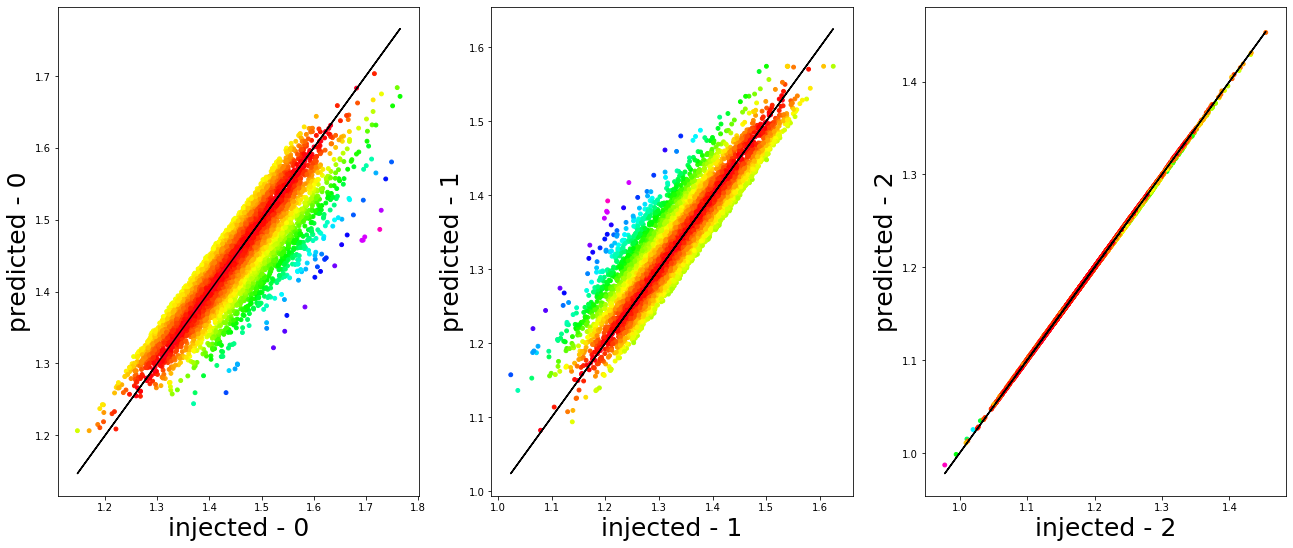

In [9]:
NN.plot_predictions(NN.xtest)

In [10]:
# test with load 
NN.save_model(model_name='example-model', verbose=True)
NN_loaded = classyNN.RegressionNN(load_model='example-model', verbose=True)
NN.print_info()
print('-'*100)
NN_loaded.print_info()
print('-'*100)

example-model saved
example-model loaded
Nfeatures           : 3
Ntrain              : 13509
batch_size          : 64
epochs              : 50
fit_output          : <keras.callbacks.History object at 0x7fdc40c56ac0>
hidden_activation   : relu
hlayers_sizes       : (100,)
learning_rate       : 0.001
metrics_dict        : {'loss': 0.007109052501618862, 'mean_squared_error': 0.0071106115356087685, 'R2metric': 0.9550899267196655, 'R2': array([0.72847252, 0.77895549, 0.99978209]), 'R2mean': 0.8357366998091722}
model               : <keras.engine.functional.Functional object at 0x7fdc49055190>
out_intervals       : [[1.2062122,2.3996184],[0.9900429,1.5744255],[0.97205585,1.46549]]
scaler_x            : <classyNN.LinearScaler object at 0x7fdc49921850>
scaler_y            : <classyNN.LinearScaler object at 0x7fdc48019eb0>
seed                : 8367
training_time       : 14.536893090000376
validation_split    : 0.0
--------------------------------------------------------------------------------

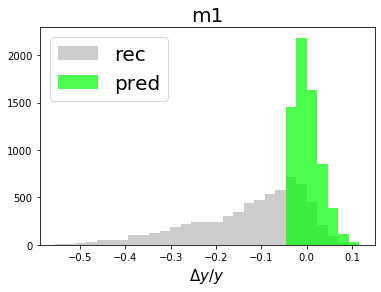

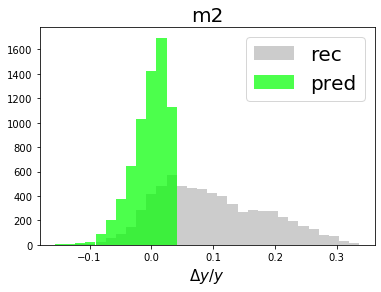

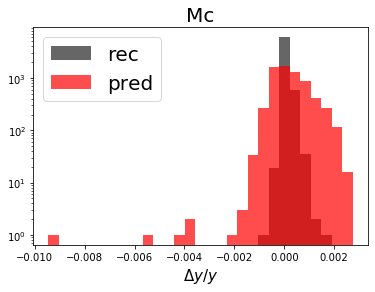

In [11]:
NN.plot_err_histogram(feature_idx=0, name='m1')
NN.plot_err_histogram(feature_idx=1, name='m2')
NN.plot_err_histogram(feature_idx=2, logscale=True, color_rec=[0.4,0.4,0.4], color_pred=[1,0,0], name='Mc')

In [12]:
NN.print_info()

Nfeatures           : 3
Ntrain              : 13509
batch_size          : 64
epochs              : 50
fit_output          : <keras.callbacks.History object at 0x7fdc40c56ac0>
hidden_activation   : relu
hlayers_sizes       : (100,)
learning_rate       : 0.001
metrics_dict        : {'loss': 0.007109052501618862, 'mean_squared_error': 0.0071106115356087685, 'R2metric': 0.9550899267196655, 'R2': array([0.72847252, 0.77895549, 0.99978209]), 'R2mean': 0.8357366998091722}
model               : <keras.engine.functional.Functional object at 0x7fdc49055190>
out_intervals       : [[1.2062122,2.3996184],[0.9900429,1.5744255],[0.97205585,1.46549]]
scaler_x            : <classyNN.LinearScaler object at 0x7fdc49921850>
scaler_y            : <classyNN.LinearScaler object at 0x7fdc48019eb0>
seed                : 8367
training_time       : 14.536893090000376
validation_split    : 0.0


## NN with hard-constraints

In [13]:
# here the key-aspect is out_interval! See the ouput with a 'crazy' input in the next cell
out_intervals = [[1,2.2],[1,1.8],[0.9,1.6]]

NNhc = classyNN.RegressionNN(Nfeatures=3, hlayers_sizes=(100,), out_intervals=out_intervals)
NNhc.load_train_dataset(fname_xtrain=path+'xtrain.csv', fname_ytrain=path+'ytrain.csv')

NNhc.training(verbose=False, epochs=50)

NNhc.load_test_dataset(fname_xtest=path+'xtest.csv', fname_ytest=path+'ytest.csv') 

In [14]:
print('-'*70,'NN: Neural Network withou hard-constraints (i.e. MinMaxScaler)','-'*70, sep='\n', end='\n')
NN.print_metrics()
print('-'*70,'NNhc: hard-constraints','-'*70, sep='\n', end='\n')
NNhc.print_metrics()

----------------------------------------------------------------------
NN: Neural Network withou hard-constraints (i.e. MinMaxScaler)
----------------------------------------------------------------------
Final R2 mean  : 0.83574
R2[ 0]         : 0.72847
R2[ 1]         : 0.77896
R2[ 2]         : 0.99978
----------------------------------------------------------------------
NNhc: hard-constraints
----------------------------------------------------------------------
Final R2 mean  : 0.83644
R2[ 0]         : 0.72978
R2[ 1]         : 0.78017
R2[ 2]         : 0.99939


In [15]:
print('Reasonable input:')
m1  = 1.3
m2  = 1.2
Mc  = (m1*m2)**(3/5)/(m1+m2)**(1/5)
pred_test = NNhc.compute_prediction([m1,m2,Mc], transform_output=True, transform_input=True)
print('input     :', np.array([[m1,m2,Mc]]))
print('prediction:', pred_test)
print('-'*60)

print('Crazy input:')
m1  = 100
m2  = -1
Mc  = -3
pred_test = NNhc.compute_prediction([m1,m2,Mc], transform_output=True, transform_input=True)
print('input     :', np.array([[m1,m2,Mc]]))
print('prediction:', pred_test)

Reasonable input:
input     : [[1.3        1.2        1.08714321]]
prediction: [[1.29871186 1.1988534  1.08496405]]
------------------------------------------------------------
Crazy input:
input     : [[100  -1  -3]]
prediction: [[2.2 1.8 1.6]]


## Using results of the new code for 'old' modules like fancyplots.py

In [16]:
import sys
sys.path.insert(0, '/home/simone/repos/IPAM2021_ML/utils')   
import fancyplots as fp

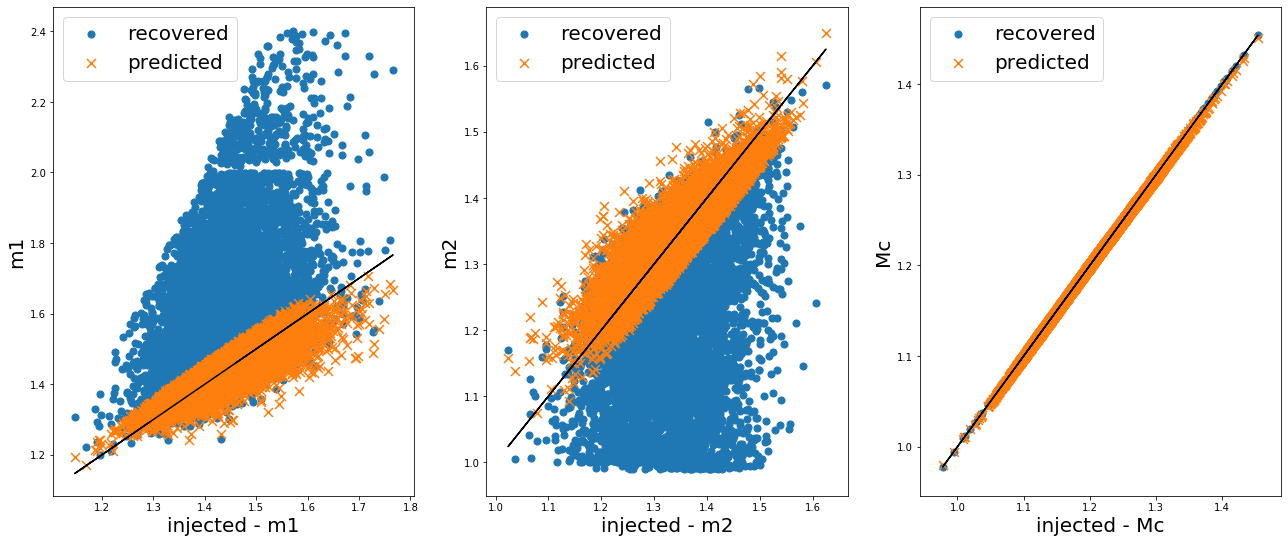

In [17]:
prediction = NNhc.compute_prediction(NNhc.xtest) # normalized prediction

fp.checkRegressionPlot(NNhc.xtest, NNhc.ytest, prediction, ['m1','m2','Mc'], \
                       scaler_y=NNhc.scaler_y, scaler_x=NNhc.scaler_x)

#fp.plotInjRecPred(NN.ytest_notnorm, NN.xtest_notnorm, NN.scaler_y.inverse_transform(prediction), idx_Mc=2)

## Example of cross-validation 

e:25-bs:128-alpha:0.001-1layers:75-oc:[[1.0,2.2],[1.0,1.8],[0.9,1.6]]-seed:None       already saved in exampledict
e:25-bs:128-alpha:0.001-2layers:75+75-oc:[[1.0,2.2],[1.0,1.8],[0.9,1.6]]-seed:None    already saved in exampledict
e:25-bs:128-alpha:0.001-2layers:75+150-oc:[[1.0,2.2],[1.0,1.8],[0.9,1.6]]-seed:None   already saved in exampledict
e:25-bs:128-alpha:0.001-2layers:75+225-oc:[[1.0,2.2],[1.0,1.8],[0.9,1.6]]-seed:None   already saved in exampledict
e:25-bs:128-alpha:0.001-1layers:150-oc:[[1.0,2.2],[1.0,1.8],[0.9,1.6]]-seed:None      already saved in exampledict
e:25-bs:128-alpha:0.001-2layers:150+75-oc:[[1.0,2.2],[1.0,1.8],[0.9,1.6]]-seed:None   already saved in exampledict
e:25-bs:128-alpha:0.001-2layers:150+150-oc:[[1.0,2.2],[1.0,1.8],[0.9,1.6]]-seed:None  already saved in exampledict
e:25-bs:128-alpha:0.001-2layers:150+225-oc:[[1.0,2.2],[1.0,1.8],[0.9,1.6]]-seed:None  already saved in exampledict
e:25-bs:128-alpha:0.001-1layers:225-oc:[[1.0,2.2],[1.0,1.8],[0.9,1.6]]-seed:None

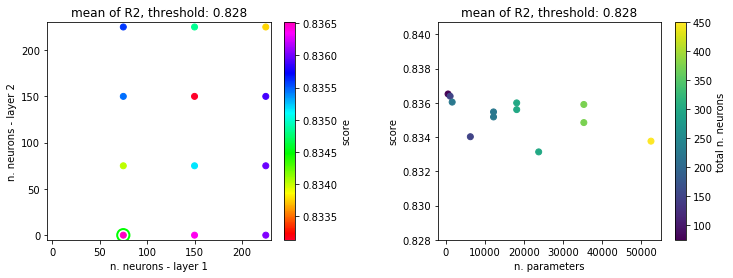

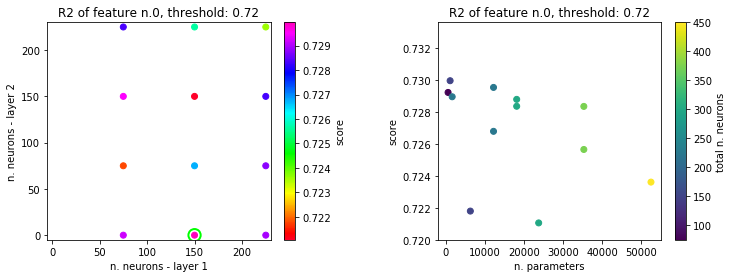

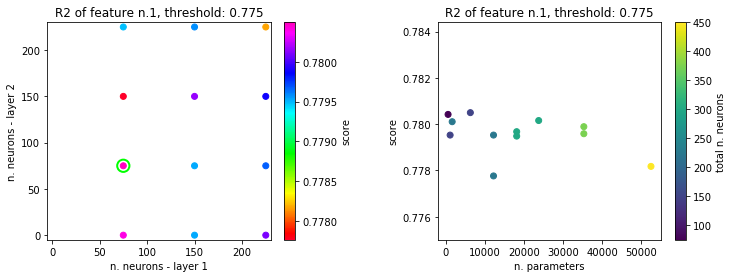

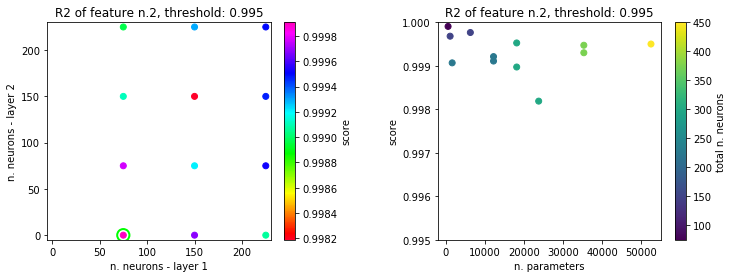

In [18]:
dict_name = 'exampledict'

path = "/home/simone/repos/IPAM2021_ML/datasets/GSTLAL_EarlyWarning_Dataset/Dataset/m1m2Mc/"
xtrain = path+'xtrain.csv'
ytrain = path+'ytrain.csv'
xtest  = path+'xtest.csv'
ytest  = path+'ytest.csv'

out_intervals = [[1,2.2],[1,1.8],[0.9,1.6]]

# without fixing the seed 
CV = classyNN.CrossValidator(neurons_step=75, Nneurons_max=300, \
                             fname_xtrain=xtrain, fname_ytrain=ytrain, fname_xtest=xtest, \
                             fname_ytest=ytest, epochs=25, batch_size=128, \
                             out_intervals=out_intervals, dict_name=dict_name,
                             seed=None)
CV.crossval(verbose=True)
CV.plot(feature_idx=-1, threshold=0.828)
CV.plot(feature_idx= 0, threshold=0.72)
CV.plot(feature_idx= 1, threshold=0.775)
CV.plot(feature_idx= 2, threshold=0.995)

e:25-bs:128-alpha:0.001-1layers:75-oc:[[1.0,2.2],[1.0,1.8],[0.9,1.6]]-seed:1          already saved in exampledict
e:25-bs:128-alpha:0.001-2layers:75+75-oc:[[1.0,2.2],[1.0,1.8],[0.9,1.6]]-seed:1       already saved in exampledict
e:25-bs:128-alpha:0.001-2layers:75+150-oc:[[1.0,2.2],[1.0,1.8],[0.9,1.6]]-seed:1      already saved in exampledict
e:25-bs:128-alpha:0.001-2layers:75+225-oc:[[1.0,2.2],[1.0,1.8],[0.9,1.6]]-seed:1      already saved in exampledict
e:25-bs:128-alpha:0.001-1layers:150-oc:[[1.0,2.2],[1.0,1.8],[0.9,1.6]]-seed:1         already saved in exampledict
e:25-bs:128-alpha:0.001-2layers:150+75-oc:[[1.0,2.2],[1.0,1.8],[0.9,1.6]]-seed:1      already saved in exampledict
e:25-bs:128-alpha:0.001-2layers:150+150-oc:[[1.0,2.2],[1.0,1.8],[0.9,1.6]]-seed:1     already saved in exampledict
e:25-bs:128-alpha:0.001-2layers:150+225-oc:[[1.0,2.2],[1.0,1.8],[0.9,1.6]]-seed:1     already saved in exampledict
e:25-bs:128-alpha:0.001-1layers:225-oc:[[1.0,2.2],[1.0,1.8],[0.9,1.6]]-seed:1   

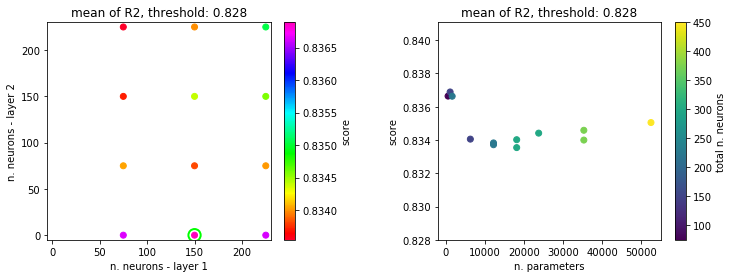

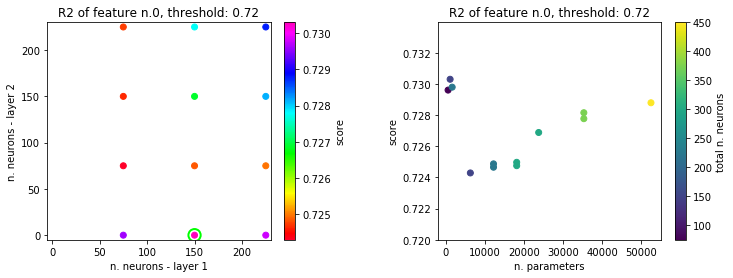

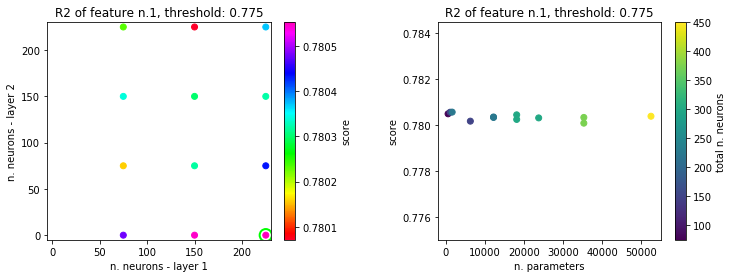

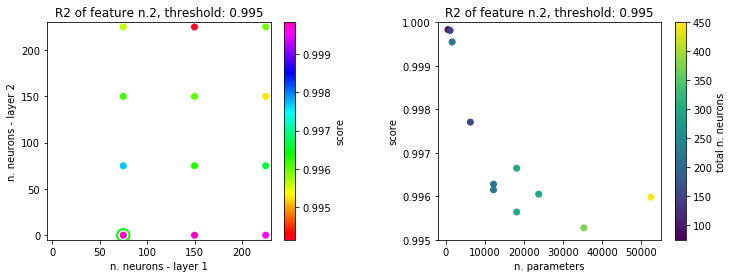

In [19]:
# fixing the seed 
CV = classyNN.CrossValidator(neurons_step=75, Nneurons_max=300, \
                             fname_xtrain=xtrain, fname_ytrain=ytrain, fname_xtest=xtest, \
                             fname_ytest=ytest, epochs=25, batch_size=128, \
                             out_intervals=out_intervals, dict_name=dict_name,
                             seed=1)
CV.crossval(verbose=True)
CV.plot(feature_idx=-1, threshold=0.828)
CV.plot(feature_idx= 0, threshold=0.72)
CV.plot(feature_idx= 1, threshold=0.775)
CV.plot(feature_idx= 2, threshold=0.995)